###  Data collection 

###  Importing libraries

In [2]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sn

In [3]:
import pandas as pd 
diam = pd.read_csv(r"C:\Users\Aradhna\Desktop\datasets\diamonds.csv")
diam

,Unnamed: 0,carat,cut,color,clarity,depth,table,price,x,y,z
0,1,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,2,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,3,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,4,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,5,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75
...,...,...,...,...,...,...,...,...,...,...,...
53935,53936,0.72,Ideal,D,SI1,60.8,57.0,2757,5.75,5.76,3.50
53936,53937,0.72,Good,D,SI1,63.1,55.0,2757,5.69,5.75,3.61
53937,53938,0.70,Very Good,D,SI1,62.8,60.0,2757,5.66,5.68,3.56
53938,53939,0.86,Premium,H,SI2,61.0,58.0,2757,6.15,6.12,3.74


##  Exploratoty data analysis

###  Collection all the info about the data

In [4]:
diam.shape

(53940, 11)

In [6]:
diam.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 53940 entries, 0 to 53939
Data columns (total 11 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  53940 non-null  int64  
 1   carat       53940 non-null  float64
 2   cut         53940 non-null  object 
 3   color       53940 non-null  object 
 4   clarity     53940 non-null  object 
 5   depth       53940 non-null  float64
 6   table       53940 non-null  float64
 7   price       53940 non-null  int64  
 8   x           53940 non-null  float64
 9   y           53940 non-null  float64
 10  z           53940 non-null  float64
dtypes: float64(6), int64(2), object(3)
memory usage: 4.5+ MB


In [7]:
diam.describe()

,Unnamed: 0,carat,depth,table,price,x,y,z
count,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000
mean,26970.500000,0.797940,61.749405,57.457184,3932.799722,5.731157,5.734526,3.538734
std,15571.281097,0.474011,1.432621,2.234491,3989.439738,1.121761,1.142135,0.705699
min,1.000000,0.200000,43.000000,43.000000,326.000000,0.000000,0.000000,0.000000
25%,13485.750000,0.400000,61.000000,56.000000,950.000000,4.710000,4.720000,2.910000
50%,26970.500000,0.700000,61.800000,57.000000,2401.000000,5.700000,5.710000,3.530000
75%,40455.250000,1.040000,62.500000,59.000000,5324.250000,6.540000,6.540000,4.040000
max,53940.000000,5.010000,79.000000,95.000000,18823.000000,10.740000,58.900000,31.800000


In [8]:
diam.isnull().sum()

Unnamed: 0    0
carat         0
cut           0
color         0
clarity       0
depth         0
table         0
price         0
x             0
y             0
z             0
dtype: int64

#### extracting relevant Information about each column 

In [10]:
diam['cut'].nunique(),diam['cut'].unique()

(5, array(['Ideal', 'Premium', 'Good', 'Very Good', 'Fair'], dtype=object))

In [11]:
diam.columns

Index(['Unnamed: 0', 'carat', 'cut', 'color', 'clarity', 'depth', 'table',
       'price', 'x', 'y', 'z'],
      dtype='object')

In [12]:
diam['color'].nunique(), diam['color'].unique()

(7, array(['E', 'I', 'J', 'H', 'F', 'G', 'D'], dtype=object))

In [13]:
diam['clarity'].nunique(),diam['clarity'].unique()

(8,
 array(['SI2', 'SI1', 'VS1', 'VS2', 'VVS2', 'VVS1', 'I1', 'IF'],
       dtype=object))

In [14]:
diam.head()

,Unnamed: 0,carat,cut,color,clarity,depth,table,price,x,y,z
0,1,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,2,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,3,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,4,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,5,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75


### describe only  "object" columns of diamond dataframe

In [15]:
# will describe only those columns of dataframe that have dytpe as object 
diam.describe(include = 'object')

,cut,color,clarity
count,53940,53940,53940
unique,5,7,8
top,Ideal,G,SI1
freq,21551,11292,13065


### Extract 55%  data from diamond dataset  and store in new variable 

In [16]:
diam_55 = diam.sample(frac=0.55, random_state = 99)
diam_55

,Unnamed: 0,carat,cut,color,clarity,depth,table,price,x,y,z
42653,42654,0.40,Premium,G,IF,60.8,58.0,1333,4.73,4.77,2.89
4069,4070,0.31,Very Good,D,SI1,63.0,55.0,571,4.32,4.34,2.73
27580,27581,1.60,Ideal,F,VS2,62.0,55.0,18421,7.49,7.54,4.66
33605,33606,0.31,Good,D,SI2,63.1,54.0,462,4.33,4.38,2.75
34415,34416,0.30,Ideal,G,IF,61.2,57.0,863,4.35,4.38,2.67
...,...,...,...,...,...,...,...,...,...,...,...
25244,25245,1.50,Premium,F,VS2,60.9,60.0,13853,7.42,7.35,4.50
42307,42308,0.41,Ideal,F,VVS1,62.1,57.0,1295,4.75,4.79,2.96
48360,48361,0.56,Very Good,E,VS2,61.1,57.0,1963,5.33,5.37,3.27
41344,41345,0.54,Ideal,I,VS1,61.9,54.0,1216,5.24,5.29,3.26


###  extract the remaining 45% data and store it in new variable

In [19]:
diam_45 = diam.loc[~diam.index.isin(diam_55.index)]
diam_45

,Unnamed: 0,carat,cut,color,clarity,depth,table,price,x,y,z
0,1,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
11,12,0.23,Ideal,J,VS1,62.8,56.0,340,3.93,3.90,2.46
13,14,0.31,Ideal,J,SI2,62.2,54.0,344,4.35,4.37,2.71
14,15,0.20,Premium,E,SI2,60.2,62.0,345,3.79,3.75,2.27
15,16,0.32,Premium,E,I1,60.9,58.0,345,4.38,4.42,2.68
...,...,...,...,...,...,...,...,...,...,...,...
53919,53920,0.76,Ideal,I,VVS1,62.2,55.0,2753,5.89,5.87,3.66
53923,53924,0.73,Ideal,I,VS2,61.3,56.0,2756,5.80,5.84,3.57
53926,53927,0.71,Ideal,E,SI1,61.9,56.0,2756,5.71,5.73,3.54
53934,53935,0.72,Premium,D,SI1,62.7,59.0,2757,5.69,5.73,3.58


### percentages of each value of cut series occurs in diamonds DataFrame.

In [20]:
# will give the %age of each unique value present in the cut column of diamond dataframe

diam.cut.value_counts(normalize = True)

Ideal        0.399537
Premium      0.255673
Very Good    0.223990
Good         0.090953
Fair         0.029848
Name: cut, dtype: float64

### sort a Series by its values and index of diamonds DataFrame

In [21]:
# sorting as per the index
diam.cut.value_counts().sort_index()

Fair          1610
Good          4906
Ideal        21551
Premium      13791
Very Good    12082
Name: cut, dtype: int64

In [22]:
# sorting as per the values
diam.cut.value_counts().sort_values()

Fair          1610
Good          4906
Very Good    12082
Premium      13791
Ideal        21551
Name: cut, dtype: int64

###  checking the maximum no of rows and col that jupyter can show at a time and how  to change that

In [23]:
pd.options.display.max_rows

60

In [24]:
pd.options.display.max_columns

20

###  first 6 rows from specified column 

In [25]:
user_cols = ['carat','cut','x','y','z']
diam[user_cols].head(6) # to print first 6 rows from the specified column 

,carat,cut,x,y,z
0,0.23,Ideal,3.95,3.98,2.43
1,0.21,Premium,3.89,3.84,2.31
2,0.23,Good,4.05,4.07,2.31
3,0.29,Premium,4.20,4.23,2.63
4,0.31,Good,4.34,4.35,2.75
5,0.24,Very Good,3.94,3.96,2.48


###  Merge the two columns  'cut' and 'colur' and make  an another col  name 'quality-colour'

In [26]:
# merge the two columns  cut and colur and make  an another col  name quality colour

diam['Quality-colour']=diam.cut +' ' +diam.color
diam

,Unnamed: 0,carat,cut,color,clarity,depth,table,price,x,y,z,Quality-colour
0,1,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43,Ideal E
1,2,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31,Premium E
2,3,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31,Good E
3,4,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63,Premium I
4,5,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75,Good J
...,...,...,...,...,...,...,...,...,...,...,...,...
53935,53936,0.72,Ideal,D,SI1,60.8,57.0,2757,5.75,5.76,3.50,Ideal D
53936,53937,0.72,Good,D,SI1,63.1,55.0,2757,5.69,5.75,3.61,Good D
53937,53938,0.70,Very Good,D,SI1,62.8,60.0,2757,5.66,5.68,3.56,Very Good D
53938,53939,0.86,Premium,H,SI2,61.0,58.0,2757,6.15,6.12,3.74,Premium H


### Rename two of the columns of the diamonds Dataframe

In [27]:
diam.rename(columns={'cut' : 'Quality','price':'Price'})

,Unnamed: 0,carat,Quality,color,clarity,depth,table,Price,x,y,z,Quality-colour
0,1,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43,Ideal E
1,2,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31,Premium E
2,3,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31,Good E
3,4,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63,Premium I
4,5,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75,Good J
...,...,...,...,...,...,...,...,...,...,...,...,...
53935,53936,0.72,Ideal,D,SI1,60.8,57.0,2757,5.75,5.76,3.50,Ideal D
53936,53937,0.72,Good,D,SI1,63.1,55.0,2757,5.69,5.75,3.61,Good D
53937,53938,0.70,Very Good,D,SI1,62.8,60.0,2757,5.66,5.68,3.56,Very Good D
53938,53939,0.86,Premium,H,SI2,61.0,58.0,2757,6.15,6.12,3.74,Premium H


In [28]:
diam.head()

,Unnamed: 0,carat,cut,color,clarity,depth,table,price,x,y,z,Quality-colour
0,1,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43,Ideal E
1,2,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31,Premium E
2,3,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31,Good E
3,4,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63,Premium I
4,5,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75,Good J


###   Operation with  duplicates

In [29]:
# calulating total no of duplicates

diam.duplicated().sum()

0

In [31]:
# checking for the duplicate rows 

diam[diam.duplicated()]

,Unnamed: 0,carat,cut,color,clarity,depth,table,price,x,y,z,Quality-colour


####  Visualizing the dataset 

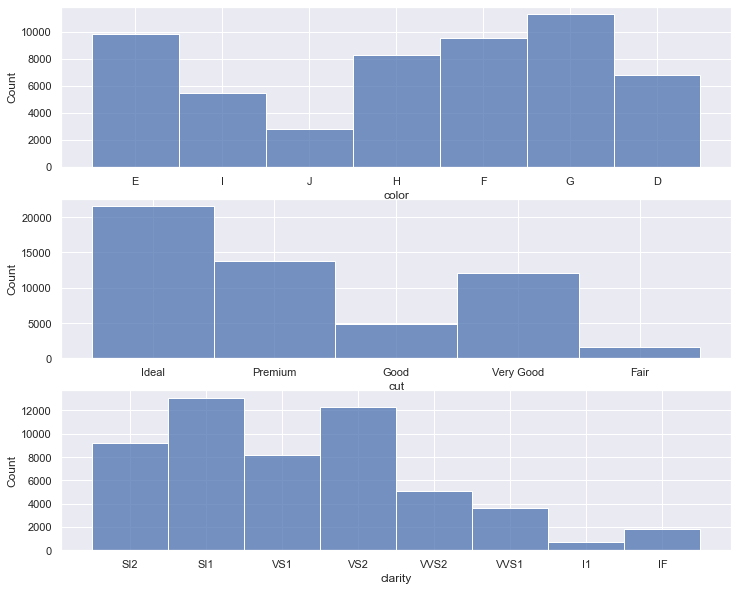

In [32]:
plt.figure(figsize = (12,10))
sn.set(style = 'darkgrid')

plt.subplot(3,1,1)
sn.histplot(diam['color'])

plt.subplot(3,1,2)
sn.histplot(diam['cut'])

plt.subplot(3,1,3)
sn.histplot(diam['clarity'])

plt.show()

In [33]:
diam.head()

,Unnamed: 0,carat,cut,color,clarity,depth,table,price,x,y,z,Quality-colour
0,1,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43,Ideal E
1,2,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31,Premium E
2,3,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31,Good E
3,4,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63,Premium I
4,5,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75,Good J


<AxesSubplot:xlabel='carat', ylabel='depth'>

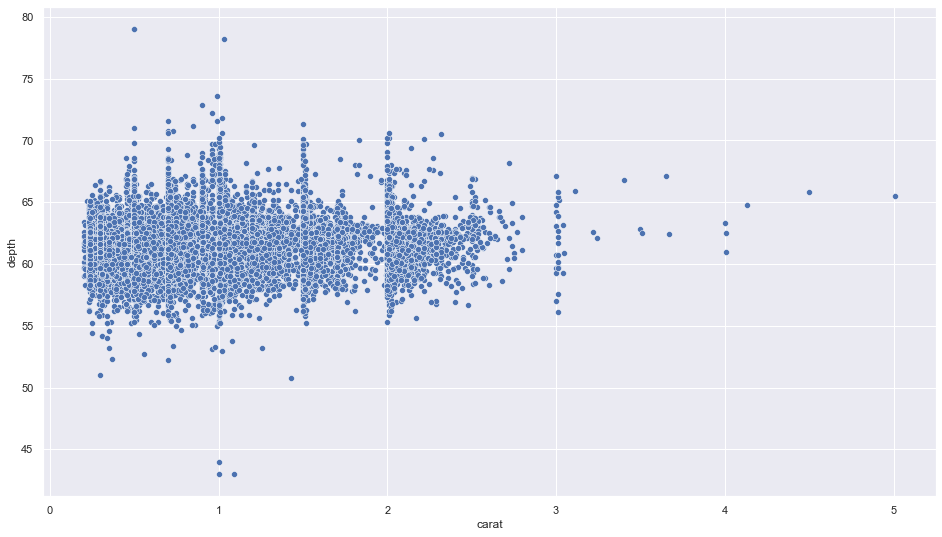

In [34]:
plt.figure(figsize = (16,9))

sn.scatterplot(x='carat',y = 'depth' ,data =diam)

###  arrange the x  column in ascending and price column in descending order

In [35]:
pd.DataFrame(diam.x.sort_values(ascending =True))

,x
49556,0.00
26243,0.00
27429,0.00
15951,0.00
49557,0.00
...,...
26444,10.01
25999,10.02
25998,10.14
27630,10.23


In [36]:
pd.DataFrame(diam.price.sort_values(ascending = False))

,price
27749,18823
27748,18818
27747,18806
27746,18804
27745,18803
...,...
4,335
3,334
2,327
1,326


####  remove multiple rows at once 

In [37]:
# Write a Pandas program to remove multiple rows at once (axis=0 refers to rows) from diamonds dataframe

print('\nRemoving the multiple rows at once')
diam.drop([53937,53938],axis=0)
#  can apply inplace = True for change in original data sheet 


Removing the multiple rows at once


,Unnamed: 0,carat,cut,color,clarity,depth,table,price,x,y,z,Quality-colour
0,1,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43,Ideal E
1,2,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31,Premium E
2,3,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31,Good E
3,4,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63,Premium I
4,5,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75,Good J
...,...,...,...,...,...,...,...,...,...,...,...,...
53933,53934,0.70,Very Good,E,VS2,61.2,59.0,2757,5.69,5.72,3.49,Very Good E
53934,53935,0.72,Premium,D,SI1,62.7,59.0,2757,5.69,5.73,3.58,Premium D
53935,53936,0.72,Ideal,D,SI1,60.8,57.0,2757,5.75,5.76,3.50,Ideal D
53936,53937,0.72,Good,D,SI1,63.1,55.0,2757,5.69,5.75,3.61,Good D


###  Filtering  

#### show only those diamond that have price less than  1000$  and best  clarity and color
    clarity -- I1 (worst), SI2, SI1, VS2, VS1, VVS2, VVS1, IF (best) 
    color  - - J (worst) to D (best

In [72]:
diam[(diam['price'] <=1000) &(diam['clarity'] == 'IF') & (diam['color'] ==  'D') ]

,Unnamed: 0,carat,cut,color,clarity,depth,table,price,x,y,z,Quality-colour
35228,35229,0.27,Ideal,D,IF,62.4,56.0,893,4.15,4.12,2.58,Ideal D


####  find the dataset , where length>5, width>5 and depth>5.

In [39]:
# Write a Pandas program to find the details of the diamonds where length>5, width>5 and depth>5.

print('\nthe dimension  greater than 5\n')
result = diam[(diam.x > 5) & (diam.y > 5) &(diam.z > 5)] # and is not supported & is supported 

result


the dimension  greater than 5



,Unnamed: 0,carat,cut,color,clarity,depth,table,price,x,y,z,Quality-colour
11778,11779,1.83,Fair,J,I1,70.0,58.0,5083,7.34,7.28,5.12,Fair J
13002,13003,2.14,Fair,J,I1,69.4,57.0,5405,7.74,7.70,5.36,Fair J
13118,13119,2.15,Fair,J,I1,65.5,57.0,5430,8.01,7.95,5.23,Fair J
13562,13563,1.96,Fair,F,I1,66.6,60.0,5554,7.59,7.56,5.04,Fair F
13757,13758,2.22,Fair,J,I1,66.7,56.0,5607,8.04,8.02,5.36,Fair J
...,...,...,...,...,...,...,...,...,...,...,...,...
27748,27749,2.00,Very Good,G,SI1,63.5,56.0,18818,7.90,7.97,5.04,Very Good G
27749,27750,2.29,Premium,I,VS2,60.8,60.0,18823,8.50,8.47,5.16,Premium I
48410,48411,0.51,Very Good,E,VS1,61.8,54.7,1970,5.12,5.15,31.80,Very Good E
49189,49190,0.51,Ideal,E,VS1,61.8,55.0,2075,5.15,31.80,5.12,Ideal E


#### about a particular value 

In [40]:
result1 = diam[(diam.cut=='Premium') | (diam.cut == 'Ideal')]
result1.head ()

,Unnamed: 0,carat,cut,color,clarity,depth,table,price,x,y,z,Quality-colour
0,1,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43,Ideal E
1,2,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31,Premium E
3,4,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63,Premium I
11,12,0.23,Ideal,J,VS1,62.8,56.0,340,3.93,3.90,2.46,Ideal J
12,13,0.22,Premium,F,SI1,60.4,61.0,342,3.88,3.84,2.33,Premium F


####   using groupby  

In [42]:
diam.groupby('cut').price.agg(['count','min','max'])

,count,min,max
cut,,,
Fair,1610,337,18574
Good,4906,327,18788
Ideal,21551,326,18806
Premium,13791,326,18823
Very Good,12082,336,18818


### create a side-by-side bar plot of the diamonds DataFrame

<AxesSubplot:xlabel='cut'>

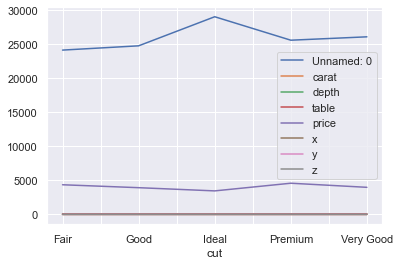

In [43]:
diam.groupby("cut").mean().plot()

###  count how many times each value in cut series of diamonds DataFrame occurs

In [45]:
gr_cut= diam.groupby('cut')
gr_cut

In [46]:
gr_cut.get_group("Fair")

,Unnamed: 0,carat,cut,color,clarity,depth,table,price,x,y,z,Quality-colour
8,9,0.22,Fair,E,VS2,65.1,61.0,337,3.87,3.78,2.49,Fair E
91,92,0.86,Fair,E,SI2,55.1,69.0,2757,6.45,6.33,3.52,Fair E
97,98,0.96,Fair,F,SI2,66.3,62.0,2759,6.27,5.95,4.07,Fair F
123,124,0.70,Fair,F,VS2,64.5,57.0,2762,5.57,5.53,3.58,Fair F
124,125,0.70,Fair,F,VS2,65.3,55.0,2762,5.63,5.58,3.66,Fair F
...,...,...,...,...,...,...,...,...,...,...,...,...
53757,53758,0.72,Fair,F,VS2,55.4,64.0,2724,6.06,5.97,3.34,Fair F
53800,53801,0.90,Fair,I,VS1,68.7,62.0,2732,5.83,5.79,3.99,Fair I
53863,53864,1.00,Fair,I,SI2,66.8,56.0,2743,6.22,6.12,4.13,Fair I
53879,53880,1.04,Fair,G,SI2,65.2,57.0,2745,6.25,6.23,4.07,Fair G


In [47]:
# original answer to the question 

gr_cut.agg(['count'])

,Unnamed: 0,carat,color,clarity,depth,table,price,x,y,z,Quality-colour
,count,count,count,count,count,count,count,count,count,count,count
cut,,,,,,,,,,,
Fair,1610,1610,1610,1610,1610,1610,1610,1610,1610,1610,1610
Good,4906,4906,4906,4906,4906,4906,4906,4906,4906,4906,4906
Ideal,21551,21551,21551,21551,21551,21551,21551,21551,21551,21551,21551
Premium,13791,13791,13791,13791,13791,13791,13791,13791,13791,13791,13791
Very Good,12082,12082,12082,12082,12082,12082,12082,12082,12082,12082,12082


### compute a cross-tabulation of two Series in diamonds DataFrame.

In [48]:
cross_tab = pd.crosstab(diam.cut,diam.price)
cross_tab

price,326,327,334,335,336,337,338,339,340,342,...,18787,18788,18791,18795,18797,18803,18804,18806,18818,18823
cut,,,,,,,,,,,,,,,,,,,,,
Fair,0,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
Good,0,1,0,1,0,0,0,1,0,0,...,0,1,0,0,0,0,0,0,0,0
Ideal,1,0,0,0,0,0,0,0,1,0,...,1,0,1,0,0,0,1,1,0,0
Premium,1,0,1,0,0,0,0,0,0,1,...,0,0,1,2,1,0,0,0,0,1
Very Good,0,0,0,0,2,1,1,0,0,0,...,0,0,0,0,0,1,0,0,1,0


### calculate various summary statistics of cut series of diamonds DataFrame.

In [49]:
diam.carat.describe()

count    53940.000000
mean         0.797940
std          0.474011
min          0.200000
25%          0.400000
50%          0.700000
75%          1.040000
max          5.010000
Name: carat, dtype: float64

### create a histogram of the 'carat' Series (distribution of a numerical variable) of diamonds DataFrame

<AxesSubplot:ylabel='Frequency'>

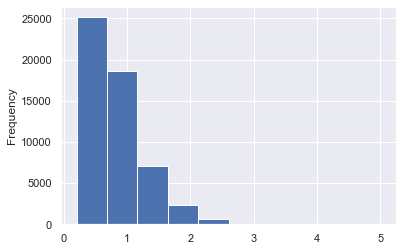

In [50]:
diam.carat.plot(kind='hist')

###   create a bar plot of the 'value_counts' for the 'cut' series of diamonds DataFrame.

<AxesSubplot:>

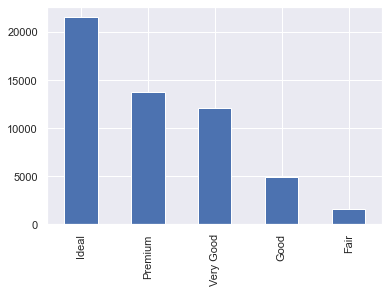

In [51]:
diam.cut.value_counts().plot(kind='bar')

### set an existing column as the index of diamonds DataFrame

In [55]:
dmm =diam.head(3)
dmm

,Unnamed: 0,carat,cut,color,clarity,depth,table,price,x,y,z,Quality-colour
0,1,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43,Ideal E
1,2,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31,Premium E
2,3,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31,Good E


In [56]:
dmm.index = dmm['clarity']
dmm

,Unnamed: 0,carat,cut,color,clarity,depth,table,price,x,y,z,Quality-colour
clarity,,,,,,,,,,,,
SI2,1,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43,Ideal E
SI1,2,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31,Premium E
VS1,3,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31,Good E


### calculate the multiplication of length, width and depth for each cut of diamonds DataFrame

In [57]:
print((diam.x*diam.y*diam.z).head())

0    38.202030
1    34.505856
2    38.076885
3    46.724580
4    51.917250
dtype: float64


### read specified rows and all columns of diamonds DataFrame.

In [58]:
diam.iloc[0]

Unnamed: 0              1
carat                0.23
cut                 Ideal
color                   E
clarity               SI2
depth                61.5
table                55.0
price                 326
x                    3.95
y                    3.98
z                    2.43
Quality-colour    Ideal E
Name: 0, dtype: object

###  read rows 0, 5, 7 and all columns of diamonds DataFrame.

In [59]:
diam.loc[[0,5,7]]  # as loc is used to slice explicitly 

,Unnamed: 0,carat,cut,color,clarity,depth,table,price,x,y,z,Quality-colour
0,1,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43,Ideal E
5,6,0.24,Very Good,J,VVS2,62.8,57.0,336,3.94,3.96,2.48,Very Good J
7,8,0.26,Very Good,H,SI1,61.9,55.0,337,4.07,4.11,2.53,Very Good H


###  read rows in which the 'cut' is 'Premium', column 'color' of diamonds DataFrame

In [60]:
gg=diam.groupby('cut')

In [61]:
gg.get_group('Premium').head(10)

,Unnamed: 0,carat,cut,color,clarity,depth,table,price,x,y,z,Quality-colour
1,2,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31,Premium E
3,4,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63,Premium I
12,13,0.22,Premium,F,SI1,60.4,61.0,342,3.88,3.84,2.33,Premium F
14,15,0.20,Premium,E,SI2,60.2,62.0,345,3.79,3.75,2.27,Premium E
15,16,0.32,Premium,E,I1,60.9,58.0,345,4.38,4.42,2.68,Premium E
26,27,0.24,Premium,I,VS1,62.5,57.0,355,3.97,3.94,2.47,Premium I
45,46,0.29,Premium,F,SI1,62.4,58.0,403,4.24,4.26,2.65,Premium F
53,54,0.22,Premium,E,VS2,61.6,58.0,404,3.93,3.89,2.41,Premium E
54,55,0.22,Premium,D,VS2,59.3,62.0,404,3.91,3.88,2.31,Premium D
56,57,0.30,Premium,J,SI2,59.3,61.0,405,4.43,4.38,2.61,Premium J


In [62]:
diam.loc[diam.cut=="Premium","color"].head(10)  #best method 

1     E
3     I
12    F
14    E
15    E
26    I
45    F
53    E
54    D
56    J
Name: color, dtype: object

###  calculate the time taken 

In [63]:
%timeit diam.loc[diam.cut=="Premium","color"].head(10) 

7.43 ms ± 324 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)


In [64]:
%timeit gg.get_group('Premium').head(10)

2.61 ms ± 60.8 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)


In [66]:
%timeit gg=diam.groupby('cut').head(100)

10.3 ms ± 171 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)


In [ ]:
# clearly the loc method is more faste than the previous groupby

### read rows in positions 0 and 1, columns in positions 0 and 3 of diamonds DataFrame. 



In [67]:
diam.iloc[[0,1],[0,3]]  

,Unnamed: 0,color
0,1,E
1,2,E


###   get the true memory usage of diamonds DataFrame

In [68]:
diam.info(memory_usage="deep")

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 53940 entries, 0 to 53939
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Unnamed: 0      53940 non-null  int64  
 1   carat           53940 non-null  float64
 2   cut             53940 non-null  object 
 3   color           53940 non-null  object 
 4   clarity         53940 non-null  object 
 5   depth           53940 non-null  float64
 6   table           53940 non-null  float64
 7   price           53940 non-null  int64  
 8   x               53940 non-null  float64
 9   y               53940 non-null  float64
 10  z               53940 non-null  float64
 11  Quality-colour  53940 non-null  object 
dtypes: float64(6), int64(2), object(4)
memory usage: 16.0 MB


###  calculate the memory usage for each Series (in bytes) of diamonds DataFrame

In [69]:
print('memory usage for each series in bytes ')
diam.memory_usage(deep = True)

memory usage for each series in bytes 


Index                 128
Unnamed: 0         431520
carat              431520
cut               3413674
color             3128520
clarity           3242590
depth              431520
table              431520
price              431520
x                  431520
y                  431520
z                  431520
Quality-colour    3521554
dtype: int64

## creating pivot table in pandas 

In [70]:
diam.pivot_table(index='color',values=['carat','cut'],aggfunc='mean')

,carat
color,
D,0.657795
E,0.657867
F,0.736538
G,0.771190
H,0.911799
I,1.026927
J,1.162137
